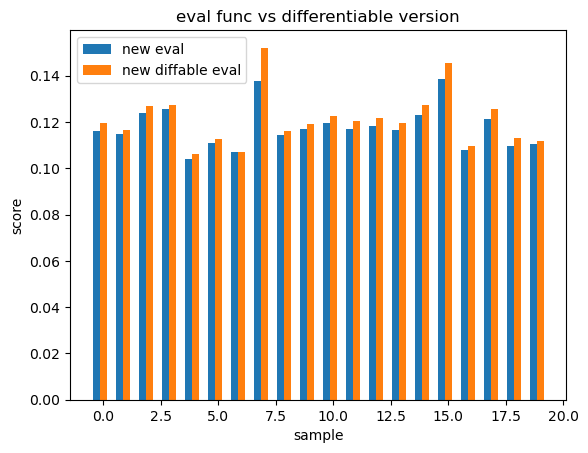

In [5]:
from checkpoint_manager_v3 import CheckpointManager
from config_manager_v3 import ConfigManager
from score_calculator import get_score_for_test_queries, get_differentiable_score_for_test_queries
from data_access_v3 import DataAccess
import numpy as np
import matplotlib.pyplot as plt

k = 50
num_samples = 20
x = range(num_samples)
schema = ConfigManager.get_config('queryConfig.schema')
table = ConfigManager.get_config('queryConfig.table')
table_size = DataAccess.select_one(f'SELECT COUNT(1) AS table_size FROM {schema}.{table}')

samples = [np.random.choice(table_size, replace=False, size=k) for i in range(num_samples)]
test_queries = CheckpointManager.load('results')[:100]
view_size = ConfigManager.get_config('samplerConfig.viewSize')
regular_scores = [get_score_for_test_queries(sample, test_queries, view_size) for sample in samples]
diffable_scores = np.array([get_differentiable_score_for_test_queries(sample, test_queries, view_size) for sample in samples])

plt.bar([p - 0.3 for p in x], regular_scores, 0.3, label='new eval')
plt.bar(x, diffable_scores, 0.3, label='new diffable eval')
plt.xlabel("sample")
plt.ylabel("score")
plt.title(f"eval func vs differentiable version")
plt.legend()
plt.show()

In [9]:
diffable_scores

[0.758168932648666,
 0.7620142552251526,
 0.7595725242443541,
 0.7579250593508361,
 0.7636011597848444,
 0.7610520534785354,
 0.7615978783205487,
 0.7589693897265729,
 0.7600405192359557,
 0.7577648754016485,
 0.7624309786791342,
 0.7567163380470611,
 0.7605207537345727,
 0.7594194642574308,
 0.7581335798241043,
 0.7586927987077803,
 0.7574229930014397,
 0.762393112443288,
 0.7604957412597202,
 0.7598538779812328,
 0.7571283777536322,
 0.7611344625671821,
 0.7613914646448673,
 0.7605490221358777,
 0.7588155134947036,
 0.7606008691021483,
 0.7616909720318468,
 0.7656020998051382,
 0.7583657256464714,
 0.7622232795325169,
 0.7600773109290366,
 0.760181224555092,
 0.7581550399325053,
 0.7580628117724967,
 0.7617793127673852,
 0.7609404041199389,
 0.7636632784965524,
 0.7611828360282381,
 0.7588627463938064,
 0.7552876502693193,
 0.7628071440331393,
 0.7615710776303628,
 0.7642669751962495,
 0.7598885865668094,
 0.7577192618874495,
 0.7563929888455099,
 0.7592064578715043,
 0.7595784777640